In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import lib
from tqdm import tqdm

import estimators
import matplotlib.pyplot as plt
from lib.analysis.constants import * # All access constants in here
from lib.analysis import plotting as plot
import pykalman

In [2]:
processed = plot.load_data(path="./data/three_drone_box_fhuman_ground_truth.npz")

In [3]:
print(processed.keys())
print(processed[DRONES[0]].keys())
print(processed[BOX].keys())

dict_keys(['drone_1', 'drone_2', 'drone_3', 'god', 'box'])
dict_keys(['external_force', 'control', 'Fd_obs', 'position', 'simulator_full_state', 'velocity', 'waypoint'])
dict_keys(['position', 'F_human'])


In [4]:
#FULL STATE = x,y,z,vx,vy,vz,roll,pitch,yaw,droll,dpitch,dyaw
def get_full_state(drone_num):
    full_state = processed[DRONES[drone_num]][SIMULATOR_FULL_STATE][:, 1:]
    return np.hstack( (full_state[:, 0:3], full_state[:, 6:9], full_state[:, 3:6], full_state[:, 9:12]) )

In [5]:
full_states = [get_full_state(i) for i in range(3)]

(-0.5436202973127365,
 3.338962087035179,
 -0.034009067760780456,
 0.6606939448509366)

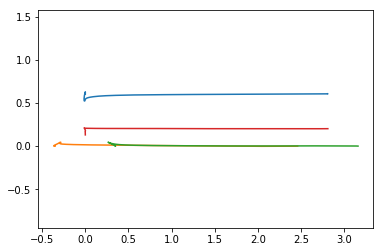

In [6]:
for states in full_states:
    plt.plot(states[:,0], states[:,1])
plt.plot(processed[BOX][POSITION][:,1],processed[BOX][POSITION][:,2])
plt.axis("equal")

In [7]:
i_init = 45
x_init = np.hstack((full_states[0][i_init,:], np.zeros(3)))
x_other_drones_init = [full_states[i][i_init,:3] for i in [1,2]]
x_box_init = processed[BOX][POSITION][i_init,1:4]
ukf = estimators.UKF_filterpy(A, B, B_GRAV.flatten(), B_DISTURBANCE, x_init, x_box_init, x_other_drones_init, BOX_MASS)

In [8]:
def get_measurements(full_states, processed, i):
    y = full_states[0][i,:]
    x_other_drones = [full_states[j][i,:3] for j in [1,2]]
    x_box = processed[BOX][POSITION][i,1:4]
    u = processed[DRONES[0]][CONTROL][i,1:]
    return y, u, x_other_drones, x_box

In [9]:
x_ests = []
F_humans = []
print(ukf.x[12:])
for i in tqdm(range(i_init, full_states[0].shape[0])):
    y, u, x_other_drones, x_box = get_measurements(full_states, processed, i)
    ukf.update_positions(x_box, x_other_drones)
    x_est, F_human = ukf.update_estimate(y, u)
    x_ests.append(x_est)
    F_humans.append(F_human)

[0. 0. 0.]


  0%|                                                                                          | 0/228 [00:00<?, ?it/s]

[2.52968224 2.53374173 0.61016068]
[2.52925588 2.54178998 0.61145803]
[2.52968155 2.37454945 0.61249069]
[2.52968313 2.59049562 0.60970639]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.53010876 2.54240079 0.61103643]
[2.52968312 2.72129366 0.60939897]
[2.52968134 2.47568488 0.610829  ]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.53374173 0.61016068]
[2.52968224 2.533741

  1%|▋                                                                                 | 2/228 [00:00<00:20, 11.18it/s]

[2.49884152 2.50804261 0.61093211]
[2.49809362 2.51979756 0.6127583 ]
[2.49883829 2.31475312 0.61413786]
[2.49884279 2.57901004 0.61034495]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49958991 2.52224319 0.61250708]
[2.49884567 2.74556894 0.61017882]
[2.49884023 2.43501643 0.61186449]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.50804261 0.61093211]
[2.49884152 2.508042

  2%|█▍                                                                                | 4/228 [00:00<00:19, 11.51it/s]

[2.46406592 2.47658186 0.61218937]
[2.46367915 2.48679862 0.61244939]
[2.46406336 2.28756599 0.61553077]
[2.46406315 2.54710041 0.61151829]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46445281 2.49167014 0.61525915]
[2.46406908 2.70862038 0.61120099]
[2.46406879 2.40402729 0.61321183]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.47658186 0.61218937]
[2.46406592 2.476581

  3%|██▏                                                                               | 6/228 [00:00<00:19, 11.63it/s]

[2.43224338 2.44491615 0.61420066]
[2.43233775 2.45378077 0.6129577 ]
[2.43224414 2.26108111 0.61762423]
[2.43224491 2.51455535 0.61343067]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43214901 2.46049747 0.61866792]
[2.43224246 2.6701133  0.61301459]
[2.43224179 2.3732898  0.61532537]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.44491615 0.61420066]
[2.43224338 2.444916

  4%|██▉                                                                               | 8/228 [00:00<00:21, 10.28it/s]

[2.40554106 2.41578996 0.61828524]
[2.40588027 2.42237313 0.61472559]
[2.40554508 2.23671949 0.62171486]
[2.4055513  2.48448157 0.61736526]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40520195 2.43289906 0.62495541]
[2.40553627 2.63470374 0.61700143]
[2.40553046 2.3451708  0.6195653 ]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.41578996 0.61828524]
[2.40554106 2.415789

  4%|███▏                                                                              | 9/228 [00:00<00:21, 10.21it/s]

[2.39329543 2.40205541 0.620803  ]
[2.39365235 2.40737573 0.61620229]
[2.39330058 2.22522358 0.62421867]
[2.3933085  2.47026725 0.61979556]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39293863 2.42007819 0.62845616]
[2.3932893  2.61802222 0.61949299]
[2.39328193 2.33194841 0.62217367]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.40205541 0.620803  ]
[2.39329543 2.402055

  5%|███▉                                                                             | 11/228 [00:01<00:20, 10.43it/s]

[2.37246108 2.37694401 0.62706862]
[2.37270335 2.37941612 0.62038498]
[2.37246617 2.20422819 0.63042212]
[2.37247311 2.44420157 0.62584828]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37221887 2.39719163 0.63668232]
[2.37245501 2.58749713 0.62574799]
[2.37244865 2.30786472 0.62865951]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.37694401 0.62706862]
[2.37246108 2.376944

  5%|████▎                                                                            | 12/228 [00:01<00:23,  9.38it/s]

[2.3641183  2.36543274 0.6315344 ]
[2.36425161 2.36615191 0.62361621]
[2.36412167 2.1946246  0.63483747]
[2.36412596 2.43221371 0.63016095]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.36398499 2.38715918 0.64230693]
[2.36411426 2.57347949 0.63022532]
[2.36411037 2.29687758 0.6332832 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.36543274 0.6315344 ]
[2.3641183  2.365432

  6%|████▌                                                                            | 13/228 [00:01<00:23,  9.35it/s]

[2.35561227 2.35441318 0.63573437]
[2.35561305 2.35344242 0.62682033]
[2.35561229 2.1854392  0.63897842]
[2.35561232 2.42070626 0.63422016]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561148 2.37755404 0.64743419]
[2.35561224 2.56005027 0.63445168]
[2.35561221 2.28639206 0.63762836]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.35441318 0.63573437]
[2.35561227 2.354413

  6%|████▉                                                                            | 14/228 [00:01<00:22,  9.34it/s]

[2.34441443 2.34362168 0.6395004 ]
[2.34426129 2.34097125 0.62981457]
[2.34440912 2.17643221 0.64267586]
[2.3444038  2.40940373 0.63786522]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34456759 2.36812685 0.65191033]
[2.34442078 2.54691639 0.63826272]
[2.34442542 2.27615457 0.64151946]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.34362168 0.6395004 ]
[2.34441443 2.343621

  7%|█████▋                                                                           | 16/228 [00:01<00:23,  9.03it/s]

[2.31989266 2.32461478 0.65112755]
[2.31939087 2.31792476 0.63934504]
[2.31986951 2.1606636  0.65408948]
[2.31985022 2.38928515 0.6491257 ]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.32039469 2.35249104 0.66546676]
[2.3199204  2.52365117 0.65006142]
[2.31993657 2.25837561 0.65352513]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.32461478 0.65112755]
[2.31989266 2.324614

  7%|██████                                                                           | 17/228 [00:01<00:23,  9.02it/s]

[2.30836004 2.31561804 0.65719958]
[2.30766863 2.30712689 0.6444863 ]
[2.30832455 2.15318796 0.66004402]
[2.30829664 2.37972417 0.65501207]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30905191 2.34498344 0.67239293]
[2.30840259 2.51265767 0.65623612]
[2.30842567 2.25000158 0.65978901]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.31561804 0.65719958]
[2.30836004 2.315618

  8%|██████▍                                                                          | 18/228 [00:01<00:23,  9.04it/s]

[2.29733935 2.30629676 0.66234158]
[2.29647703 2.29643669 0.64892846]
[2.29729166 2.14540093 0.66509644]
[2.29725535 2.36988792 0.65999655]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29820238 2.33674051 0.67817133]
[2.29739652 2.50133066 0.66145028]
[2.29742629 2.24124552 0.66509383]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.30629676 0.66234158]
[2.29733935 2.306296

  8%|██████▊                                                                          | 19/228 [00:02<00:23,  9.01it/s]

[2.28714362 2.29683854 0.66651757]
[2.28613847 2.28596007 0.65259156]
[2.28708505 2.13744931 0.66920745]
[2.28704124 2.35997021 0.66404405]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28814973 2.32803983 0.68280991]
[2.28721382 2.48991223 0.66567296]
[2.2872496  2.23228838 0.66940281]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.29683854 0.66651757]
[2.28714362 2.296838

  9%|███████                                                                          | 20/228 [00:02<00:24,  8.58it/s]

[2.27754543 2.28786433 0.66979081]
[2.27642662 2.27606728 0.65549839]
[2.27747697 2.12987445 0.67242402]
[2.27742766 2.35057428 0.66721618]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27866543 2.31974603 0.6864103 ]
[2.27762745 2.47912317 0.66898803]
[2.27766734 2.22377111 0.67278092]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.28786433 0.66979081]
[2.27754543 2.287864

 10%|███████▊                                                                         | 22/228 [00:02<00:23,  8.65it/s]

[2.2572288  2.27147413 0.67357995]
[2.25595517 2.25794596 0.65896624]
[2.25714268 2.11603972 0.6761184 ]
[2.2570898  2.33340513 0.67088672]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.25850401 2.30460789 0.69046611]
[2.25733188 2.45942068 0.67285117]
[2.25737273 2.20821377 0.6766935 ]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.27147413 0.67357995]
[2.2572288  2.271474

 10%|████████▏                                                                        | 23/228 [00:02<00:23,  8.65it/s]

[2.24451448 2.26402211 0.67460549]
[2.24317353 2.24974439 0.65997571]
[2.24441962 2.10976629 0.67711536]
[2.24436666 2.32560688 0.67187857]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24585719 2.29763431 0.69148347]
[2.24462796 2.45043979 0.67389448]
[2.24466754 2.2011284  0.67775419]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.26402211 0.67460549]
[2.24451448 2.264022

 11%|████████▌                                                                        | 24/228 [00:02<00:24,  8.33it/s]

[2.23204908 2.25737279 0.67590297]
[2.23065291 2.24235217 0.66122137]
[2.23194601 2.10419461 0.6783783 ]
[2.23189321 2.31861588 0.67313551]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23344718 2.29146211 0.69280619]
[2.23217232 2.44238882 0.67521741]
[2.23221049 2.19484245 0.6790938 ]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.25737279 0.67590297]
[2.23204908 2.257372

 11%|█████████▏                                                                       | 26/228 [00:03<00:23,  8.51it/s]

[2.21586606 2.24446321 0.67779233]
[2.21441906 2.22813077 0.66302897]
[2.21575114 2.09335074 0.68019463]
[2.21570165 2.30505185 0.67496461]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21731515 2.27947131 0.69474227]
[2.21600329 2.42679821 0.67716484]
[2.21603633 2.18262663 0.68104587]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.24446321 0.67779233]
[2.21586606 2.244463

 12%|█████████▌                                                                       | 27/228 [00:03<00:23,  8.54it/s]

[2.20803281 2.23815288 0.67839722]
[2.2065489  2.2214265  0.66363945]
[2.2079123  2.08802502 0.68078745]
[2.20786329 2.29847772 0.67554838]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20951893 2.27337718 0.69532718]
[2.20817664 2.41921542 0.67777032]
[2.20820837 2.17659418 0.68167277]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.23815288 0.67839722]
[2.20803281 2.238152

 12%|█████████▉                                                                       | 28/228 [00:03<00:24,  8.26it/s]

[2.2001588  2.23200065 0.6785906 ]
[2.19863122 2.2150431  0.6638912 ]
[2.20003288 2.08281394 0.68098495]
[2.19998403 2.29210531 0.67573274]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.20168872 2.26728846 0.69545148]
[2.20030902 2.41185049 0.67794668]
[2.20033979 2.17067121 0.68187567]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.23200065 0.6785906 ]
[2.2001588  2.232000

 13%|██████████▎                                                                      | 29/228 [00:03<00:23,  8.30it/s]

[2.19319582 2.22603324 0.67851466]
[2.19162265 2.20895621 0.66389899]
[2.19306491 2.07774513 0.68092117]
[2.19301606 2.28594633 0.6756562 ]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19477148 2.26129348 0.69528497]
[2.19335195 2.40472782 0.67784566]
[2.19338198 2.16490111 0.68180063]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.22603324 0.67851466]
[2.19319582 2.226033

 13%|██████████▋                                                                      | 30/228 [00:03<00:23,  8.32it/s]

[2.18796667 2.22026951 0.67819337]
[2.18635254 2.20309636 0.66367582]
[2.18783121 2.07284079 0.68061142]
[2.18778295 2.28000203 0.67534196]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18958343 2.25550681 0.69486331]
[2.1881282  2.39786082 0.67750135]
[2.18815695 2.159322   0.68147236]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.22026951 0.67819337]
[2.18796667 2.220269

 14%|███████████                                                                      | 31/228 [00:03<00:23,  8.32it/s]

[2.18419166 2.21524172 0.67850643]
[2.18254892 2.19785724 0.66399553]
[2.18405215 2.06859325 0.68091756]
[2.18400428 2.27477303 0.67564385]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18583714 2.25058618 0.69516309]
[2.18435796 2.39182675 0.67781204]
[2.18438574 2.15450487 0.68179705]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.21524172 0.67850643]
[2.18419166 2.215241

 14%|███████████▎                                                                     | 32/228 [00:03<00:24,  8.14it/s]

[2.18061844 2.21002191 0.67826492]
[2.17895514 2.19260033 0.66382935]
[2.18047654 2.06415959 0.68068646]
[2.18042929 2.26938848 0.6754074 ]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18228455 2.24530969 0.69484455]
[2.18078753 2.38559701 0.67754897]
[2.18081436 2.14945379 0.68155048]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.21002191 0.67826492]
[2.18061844 2.210021

 14%|███████████▋                                                                     | 33/228 [00:04<00:23,  8.17it/s]

[2.17716072 2.20492982 0.67775823]
[2.17548309 2.18752308 0.66343076]
[2.1770172  2.05982862 0.68019627]
[2.176971   2.26414941 0.67491349]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17884121 2.24011392 0.6942301 ]
[2.17733167 2.37952835 0.67701437]
[2.17735724 2.1445104  0.68103072]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.20492982 0.67775823]
[2.17716072 2.204929

 15%|████████████                                                                     | 34/228 [00:04<00:23,  8.21it/s]

[2.17406435 2.20008212 0.67701342]
[2.17238836 2.18256645 0.66281889]
[2.17391952 2.05571221 0.67945933]
[2.17387629 2.25914023 0.67418863]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.1757432  2.23528784 0.69335485]
[2.17423679 2.37374137 0.67625317]
[2.17425915 2.13982629 0.68026548]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.20008212 0.67701342]
[2.17406435 2.200082

 15%|████████████▍                                                                    | 35/228 [00:04<00:23,  8.08it/s]

[2.17150209 2.19620907 0.67719715]
[2.16984272 2.17831513 0.66301405]
[2.17135571 2.05247918 0.67962199]
[2.1713156  2.25506126 0.67436454]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17316427 2.23170091 0.69352063]
[2.17167627 2.36903812 0.67645236]
[2.17169526 2.13617058 0.68045711]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.19620907 0.67719715]
[2.17150209 2.196209

 16%|█████████████▏                                                                   | 37/228 [00:04<00:23,  8.20it/s]

[2.16085861 2.18874644 0.67702875]
[2.1592174  2.17018405 0.66298275]
[2.16070794 2.04622395 0.67943765]
[2.16067442 2.24724325 0.67419511]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16250259 2.22466216 0.69319962]
[2.16103771 2.36001436 0.67628665]
[2.1610494  2.12908004 0.68028962]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.18874644 0.67702875]
[2.16085861 2.188746

 17%|█████████████▌                                                                   | 38/228 [00:04<00:23,  8.23it/s]

[2.1564127  2.18592139 0.67769728]
[2.1547544  2.16694137 0.66361866]
[2.15625726 2.04389456 0.68008542]
[2.1562254  2.24423924 0.67484073]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.15807381 2.22214481 0.69388735]
[2.15659738 2.35654395 0.6769701 ]
[2.15660669 2.12644734 0.6809815 ]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.18592139 0.67769728]
[2.1564127  2.185921

 17%|█████████████▊                                                                   | 39/228 [00:04<00:23,  8.11it/s]

[2.15330534 2.18336528 0.67867729]
[2.15162924 2.16395221 0.66451596]
[2.15314512 2.0417988  0.68103662]
[2.1531143  2.24149925 0.67578905]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15498434 2.21993022 0.69493603]
[2.15349565 2.35338714 0.67797414]
[2.15350322 2.12409059 0.68199388]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.18336528 0.67867729]
[2.15330534 2.183365

 18%|██████████████▏                                                                  | 40/228 [00:04<00:23,  8.13it/s]

[2.15087508 2.18110831 0.67986915]
[2.14919518 2.16108457 0.6655901 ]
[2.15071011 2.03997173 0.68217934]
[2.15068146 2.23902036 0.67694386]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15255788 2.21819481 0.69623115]
[2.15107094 2.35056591 0.67921471]
[2.15107563 2.12207477 0.6832237 ]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.18110831 0.67986915]
[2.15087508 2.181108

 18%|██████████████▌                                                                  | 41/228 [00:05<00:22,  8.17it/s]

[2.14878276 2.17905322 0.6809341 ]
[2.14711233 2.15819363 0.66654622]
[2.14861253 2.03832291 0.68317673]
[2.14858832 2.2367053  0.67797558]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.15045607 2.21688435 0.69739234]
[2.14898475 2.34797563 0.6803516 ]
[2.14898415 2.12030138 0.68432275]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.17905322 0.6809341 ]
[2.14878276 2.179053

 18%|██████████████▉                                                                  | 42/228 [00:05<00:22,  8.20it/s]

[2.14684719 2.17717684 0.68202012]
[2.14520247 2.15531712 0.66751717]
[2.1466722  2.03683258 0.68417998]
[2.14665381 2.23453721 0.67902768]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14849469 2.21591323 0.69858109]
[2.14705468 2.34558895 0.68152833]
[2.14704748 2.11874119 0.68544369]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.17717684 0.68202012]
[2.14684719 2.177176

 19%|███████████████▎                                                                 | 43/228 [00:05<00:22,  8.07it/s]

[2.14619968 2.17631888 0.68490209]
[2.14459505 2.15315169 0.67005362]
[2.14602037 2.03626142 0.68691946]
[2.14600602 2.2332819  0.68182709]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14780697 2.21626857 0.70178545]
[2.14641216 2.34433803 0.68457047]
[2.14640026 2.1183199  0.68841085]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.17631888 0.68490209]
[2.14619968 2.176318

 19%|███████████████▋                                                                 | 44/228 [00:05<00:22,  8.10it/s]

[2.14526127 2.17368624 0.68570753]
[2.14370331 2.14984224 0.67076668]
[2.14508244 2.03405357 0.68765825]
[2.14507189 2.23039565 0.68260851]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14682174 2.21424764 0.70267759]
[2.14547305 2.34115589 0.68544997]
[2.14545741 2.115959   0.68924147]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.17368624 0.68570753]
[2.14526127 2.173686

 20%|███████████████▉                                                                 | 45/228 [00:05<00:22,  8.13it/s]

[2.14235259 2.17136482 0.6862534 ]
[2.14085513 2.146969   0.67127808]
[2.14217675 2.03211598 0.6881625 ]
[2.14216954 2.22787726 0.68313448]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14385237 2.21239308 0.7032486 ]
[2.14256072 2.33833821 0.68603868]
[2.14254217 2.11384989 0.68980793]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.17136482 0.6862534 ]
[2.14235259 2.171364

 20%|████████████████▎                                                                | 46/228 [00:05<00:22,  8.16it/s]

[2.13708933 2.16817995 0.6856385 ]
[2.13567923 2.14366817 0.67078374]
[2.13692221 2.02937929 0.68755582]
[2.13691757 2.22458842 0.68253379]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13850148 2.20922808 0.70251045]
[2.13728702 2.33458407 0.68541051]
[2.13726719 2.11077059 0.68917866]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.16817995 0.6856385 ]
[2.13708933 2.168179

 21%|████████████████▋                                                                | 47/228 [00:05<00:22,  8.07it/s]

[2.13178063 2.16452474 0.68463376]
[2.1304399  2.14020113 0.66994709]
[2.13162205 2.02620098 0.68658726]
[2.13161853 2.22089047 0.68155562]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13312322 2.20530362 0.70133919]
[2.13196813 2.33032908 0.68436052]
[2.13194849 2.10715225 0.68814694]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.16452474 0.68463376]
[2.13178063 2.164524

 21%|█████████████████▍                                                               | 49/228 [00:05<00:21,  8.19it/s]

[2.12761483 2.15986558 0.68413429]
[2.1263548  2.13553583 0.6695617 ]
[2.12746514 2.0222392  0.68610662]
[2.12746299 2.21609242 0.68106556]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12887651 2.20055241 0.70072125]
[2.1277917  2.32477874 0.68382927]
[2.12777205 2.10263544 0.68763762]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.15986558 0.68413429]
[2.12761483 2.159865

 22%|█████████████████▊                                                               | 50/228 [00:06<00:21,  8.22it/s]

[2.12831519 2.15906358 0.68552951]
[2.1270792  2.13451527 0.67080603]
[2.12816759 2.02165346 0.68747195]
[2.12816437 2.21516937 0.6824173 ]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12955277 2.1999403  0.70225278]
[2.12848956 2.32368699 0.68524969]
[2.12847136 2.10197011 0.68907692]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.15906358 0.68552951]
[2.12831519 2.159063

 22%|██████████████████                                                               | 51/228 [00:06<00:21,  8.12it/s]

[2.12765654 2.15766336 0.68607014]
[2.12643756 2.13286264 0.67129756]
[2.12750958 2.02052547 0.68798711]
[2.12750709 2.21363763 0.68294159]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12887708 2.19874732 0.70283589]
[2.12783009 2.32192931 0.68581481]
[2.12781129 2.10071139 0.68963415]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.15766336 0.68607014]
[2.12765654 2.157663

 23%|██████████████████▍                                                              | 52/228 [00:06<00:21,  8.15it/s]

[2.12426032 2.15584074 0.68582439]
[2.12305598 2.13069253 0.67110842]
[2.12411272 2.01900142 0.68772216]
[2.12411293 2.21168047 0.68270233]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12546618 2.19719482 0.70253171]
[2.12443457 2.31972069 0.68558999]
[2.12441293 2.09902891 0.68938191]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.15584074 0.68582439]
[2.12426032 2.155840

 24%|███████████████████▏                                                             | 54/228 [00:06<00:21,  8.21it/s]

[2.11638404 2.15506236 0.68810843]
[2.11521282 2.12868964 0.67321219]
[2.11623365 2.01857542 0.68989888]
[2.11623764 2.21051896 0.68491652]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.1175567  2.19743853 0.70496344]
[2.11656148 2.31845757 0.68798883]
[2.11653563 2.09867091 0.69173729]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.15506236 0.68810843]
[2.11638404 2.155062

 24%|███████████████████▌                                                             | 55/228 [00:06<00:21,  8.13it/s]

[2.11072897 2.15406037 0.6883846 ]
[2.10958122 2.12712434 0.67350318]
[2.11057803 2.01779807 0.69013347]
[2.11058502 2.20933383 0.68518438]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11187812 2.19688226 0.70521562]
[2.11090701 2.31715668 0.68831235]
[2.11087802 2.09786395 0.69202219]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.15406037 0.6883846 ]
[2.11072897 2.154060

 25%|████████████████████▎                                                            | 57/228 [00:06<00:20,  8.19it/s]

[2.10229982 2.15165493 0.68947692]
[2.10119853 2.12382679 0.67454638]
[2.10214979 2.01583065 0.69115654]
[2.1021602  2.20662366 0.68624067]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.1034024  2.1951934  0.70633827]
[2.10247668 2.31418039 0.68947988]
[2.10244438 2.09578741 0.69315196]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.15165493 0.68947692]
[2.10229982 2.151654

 26%|████████████████████▉                                                            | 59/228 [00:07<00:20,  8.09it/s]

[2.09689422 2.14811006 0.69355822]
[2.09585137 2.11987151 0.67826273]
[2.09675093 2.01279985 0.69518558]
[2.0967573  2.2028513  0.69018917]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09793822 2.1919544  0.71074403]
[2.09706306 2.30998697 0.69360077]
[2.09703596 2.09250844 0.69736981]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.14811006 0.69355822]
[2.09689422 2.148110

 26%|█████████████████████▎                                                           | 60/228 [00:07<00:20,  8.08it/s]

[2.09662107 2.14755131 0.69464119]
[2.09561093 2.11931332 0.67924942]
[2.09648252 2.01238325 0.69625736]
[2.09648723 2.20223159 0.69123949]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09763229 2.19137125 0.71191162]
[2.09678428 2.3092387  0.69468966]
[2.09675961 2.09202007 0.69848586]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.14755131 0.69464119]
[2.09662107 2.147551

 27%|█████████████████████▋                                                           | 61/228 [00:07<00:20,  8.09it/s]

[2.0973475  2.14600782 0.69413741]
[2.09638094 2.1179668  0.6787943 ]
[2.09721574 2.01104946 0.695769  ]
[2.09721991 2.20067724 0.69075125]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.09831505 2.1896337  0.71136355]
[2.09750269 2.30742945 0.69416664]
[2.09747959 2.09048303 0.69796613]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.14600782 0.69413741]
[2.0973475  2.146007

 27%|██████████████████████                                                           | 62/228 [00:07<00:20,  8.06it/s]

[2.10119355 2.14492202 0.6942331 ]
[2.10026122 2.11688992 0.67885043]
[2.10106676 2.01012944 0.6958553 ]
[2.10107044 2.19954416 0.69084389]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10212679 2.18857392 0.71150168]
[2.10134285 2.30613122 0.69427014]
[2.10132098 2.08944741 0.69806479]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.14492202 0.6942331 ]
[2.10119355 2.144922

 28%|██████████████████████▍                                                          | 63/228 [00:07<00:20,  7.94it/s]

[2.10588965 2.14290217 0.69100176]
[2.10497799 2.11508259 0.67592904]
[2.10576604 2.00835501 0.69268165]
[2.1057725  2.19759725 0.68770362]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10680219 2.18640096 0.70798829]
[2.10603519 2.30380698 0.69097412]
[2.10601092 2.08733379 0.6947395 ]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.14290217 0.69100176]
[2.10588965 2.142902

 28%|██████████████████████▋                                                          | 64/228 [00:08<00:20,  7.93it/s]

[2.10928211 2.13984298 0.68595562]
[2.10838186 2.11226819 0.67141078]
[2.10915995 2.0056352  0.68771932]
[2.10917146 2.19463302 0.68280366]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.1101832  2.18314562 0.70245882]
[2.1094259  2.30033104 0.68583963]
[2.10939664 2.08414573 0.68954331]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.13984298 0.68595562]
[2.10928211 2.139842

 29%|███████████████████████                                                          | 65/228 [00:08<00:20,  7.91it/s]

[2.11227828 2.13809773 0.68236049]
[2.11138349 2.11057617 0.66821224]
[2.11215626 2.00412027 0.68417816]
[2.112172   2.19293275 0.67931311]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11317391 2.18137623 0.69849855]
[2.11242189 2.29829582 0.68218731]
[2.1123883  2.08233364 0.68584047]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.13809773 0.68236049]
[2.11227828 2.138097

 29%|███████████████████████▍                                                         | 66/228 [00:08<00:20,  7.89it/s]

[2.11303711 2.13718968 0.67991259]
[2.11214416 2.10966997 0.66606002]
[2.11291465 2.00336416 0.68176979]
[2.11293358 2.19204999 0.6769365 ]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11393089 2.18046269 0.69577367]
[2.11318121 2.29719139 0.67969643]
[2.11314428 2.08138608 0.6833189 ]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.13718968 0.67991259]
[2.11303711 2.137189

 29%|███████████████████████▊                                                         | 67/228 [00:08<00:20,  7.77it/s]

[2.10979    2.13440417 0.67448068]
[2.10890068 2.10752463 0.66135488]
[2.10966895 2.00089721 0.67647985]
[2.10969258 2.18945813 0.67166558]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.11068017 2.17701337 0.68965538]
[2.10993245 2.29401256 0.67410839]
[2.10989086 2.07836304 0.67772135]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.13440417 0.67448068]
[2.10979    2.134404

 30%|████████████████████████▏                                                        | 68/228 [00:08<00:20,  7.79it/s]

[2.10311912 2.12998046 0.6685831 ]
[2.1022461  2.10440957 0.6563401 ]
[2.10300358 1.99692696 0.67078958]
[2.10302985 2.18534761 0.66594359]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10399295 2.17124709 0.68291743]
[2.10325507 2.28903966 0.66797743]
[2.10321154 2.07356952 0.67164334]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.12998046 0.6685831 ]
[2.10311912 2.129980

 30%|████████████████████████▌                                                        | 69/228 [00:08<00:20,  7.81it/s]

[2.09668415 2.12650295 0.66441082]
[2.09584181 2.10229364 0.65286591]
[2.09657653 1.99382927 0.66680109]
[2.09660259 2.18215742 0.66189435]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09752725 2.16636986 0.67807185]
[2.09681078 2.28509832 0.6635923 ]
[2.0967686  2.06976042 0.66734409]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.12650295 0.66441082]
[2.09668415 2.126502

 31%|████████████████████████▊                                                        | 70/228 [00:08<00:20,  7.82it/s]

[2.09009031 2.12253143 0.66057802]
[2.08930027 2.09989474 0.64972173]
[2.08999387 1.99027569 0.66315501]
[2.09001795 2.17847988 0.65817532]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09088102 2.16079331 0.67357354]
[2.09020377 2.28061931 0.6595423 ]
[2.09016523 2.06545089 0.66339404]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.12253143 0.66057802]
[2.09009031 2.122531

 31%|█████████████████████████▏                                                       | 71/228 [00:09<00:20,  7.74it/s]

[2.08250712 2.11745138 0.65525025]
[2.08178933 2.09690031 0.64541086]
[2.08242483 1.98570656 0.65807676]
[2.08244703 2.17379901 0.65300492]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08322546 2.15360223 0.66726421]
[2.08260391 2.27492442 0.65392518]
[2.08256933 2.05991271 0.6579041 ]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.11745138 0.65525025]
[2.08250712 2.117451

 32%|█████████████████████████▌                                                       | 72/228 [00:09<00:20,  7.76it/s]

[2.07454318 2.11331582 0.65086316]
[2.07391522 2.0947659  0.64196759]
[2.07447575 1.9820051  0.6539169 ]
[2.07449506 2.17002726 0.6487445 ]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07517156 2.14742354 0.66195683]
[2.07462247 2.27026378 0.64927085]
[2.07459299 2.05536388 0.65338604]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.11331582 0.65086316]
[2.07454318 2.113315

 32%|█████████████████████████▉                                                       | 73/228 [00:09<00:19,  7.78it/s]

[2.06718049 2.10917055 0.64687519]
[2.0666561  2.09262473 0.63892615]
[2.06712804 1.97828875 0.65014076]
[2.06714403 2.16621605 0.64487167]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06770517 2.14123772 0.65704459]
[2.06724214 2.26560098 0.64503344]
[2.06721823 2.05083897 0.64927912]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.10917055 0.64687519]
[2.06718049 2.109170

 32%|██████████████████████████▎                                                      | 74/228 [00:09<00:19,  7.80it/s]

[2.06118479 2.10531799 0.64363474]
[2.06077055 2.09063652 0.6365398 ]
[2.06114626 1.97483909 0.64708038]
[2.06115863 2.16264114 0.64172412]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06159921 2.13549325 0.65296832]
[2.06123005 2.2612615  0.64157976]
[2.06121186 2.04667102 0.64594271]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.10531799 0.64363474]
[2.06118479 2.105317

 33%|██████████████████████████▋                                                      | 75/228 [00:09<00:19,  7.74it/s]

[2.05751088 2.10173037 0.64017738]
[2.05721051 2.088941   0.63407457]
[2.05748503 1.97163527 0.64380317]
[2.0574942  2.15933168 0.63836476]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05781134 2.13001025 0.6485415 ]
[2.05754124 2.25720903 0.63790849]
[2.05752814 2.04276781 0.64238388]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.10173037 0.64017738]
[2.05751088 2.101730

 33%|███████████████████████████                                                      | 76/228 [00:09<00:19,  7.74it/s]

[2.05752875 2.09831024 0.63681121]
[2.05734034 2.08721016 0.6317888 ]
[2.05751363 1.96858012 0.64059543]
[2.05751989 2.15614801 0.63509495]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.0577172  2.12493616 0.64412432]
[2.0575465  2.25334697 0.63435506]
[2.05753792 2.03907733 0.63891808]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.09831024 0.63681121]
[2.05752875 2.098310

 34%|███████████████████████████▎                                                     | 77/228 [00:09<00:19,  7.71it/s]

[2.05999404 2.09544897 0.63419348]
[2.05991314 2.08568843 0.63014699]
[2.05998791 1.96603494 0.63809746]
[2.05999086 2.15345563 0.6325523 ]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.06007495 2.12078888 0.64055801]
[2.06000124 2.25010059 0.63159533]
[2.05999734 2.03602167 0.6362227 ]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.09544897 0.63419348]
[2.05999404 2.095448

 34%|███████████████████████████▋                                                     | 78/228 [00:10<00:19,  7.69it/s]

[2.06385313 2.09356267 0.63260721]
[2.0638757  2.08465881 0.62923092]
[2.06385478 1.96438144 0.63658226]
[2.0638539  2.15165958 0.63101057]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06383056 2.11810078 0.63832061]
[2.0638512  2.24792586 0.62992317]
[2.06385233 2.0340309  0.63459016]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.09356267 0.63260721]
[2.06385313 2.093562

 35%|████████████████████████████                                                     | 79/228 [00:10<00:19,  7.62it/s]

[2.06713748 2.09208622 0.63141383]
[2.06725603 2.08385978 0.6286182 ]
[2.06714591 1.96309839 0.63544377]
[2.067141   2.15024549 0.62985129]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06701895 2.11598949 0.63656166]
[2.06712761 2.2462075  0.62866338]
[2.06713384 2.03248129 0.63336132]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.09208622 0.63141383]
[2.06713748 2.092086

 35%|████████████████████████████▍                                                    | 80/228 [00:10<00:19,  7.64it/s]

[2.06983599 2.09086527 0.63054492]
[2.07004275 2.08325395 0.62823481]
[2.06985029 1.96204532 0.63461738]
[2.06984137 2.14906808 0.62900798]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06962928 2.11418647 0.63521877]
[2.06981926 2.24477486 0.6277428 ]
[2.06983043 2.03120841 0.63246578]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.09086527 0.63054492]
[2.06983599 2.090865

 36%|████████████████████████████▊                                                    | 81/228 [00:10<00:19,  7.66it/s]

[2.07146234 2.08988707 0.63014732]
[2.0717627  2.08273307 0.62808336]
[2.0714826  1.96121217 0.63424048]
[2.07146964 2.1480982  0.62862234]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07116208 2.11276665 0.63458032]
[2.07143865 2.24361177 0.62731891]
[2.07145481 2.03021817 0.63205562]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.08988707 0.63014732]
[2.07146234 2.089887

 36%|█████████████████████████████▏                                                   | 82/228 [00:10<00:19,  7.68it/s]

[2.07100423 2.08887612 0.62983266]
[2.07139896 2.08229377 0.62801806]
[2.07102998 1.96034557 0.63395046]
[2.07101314 2.14710242 0.6283176 ]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07060968 2.11117664 0.63401785]
[2.07097414 2.24241752 0.62697345]
[2.07099503 2.02918776 0.6317306 ]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.08887612 0.62983266]
[2.07100423 2.088876

 36%|█████████████████████████████▍                                                   | 83/228 [00:10<00:19,  7.62it/s]

[2.06898827 2.08772675 0.62960471]
[2.0694723  2.08186665 0.62802922]
[2.06901841 1.95934703 0.6337501 ]
[2.06899843 2.145976   0.62809697]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.0685045  2.10928286 0.63354944]
[2.06895308 2.24107877 0.62671106]
[2.06897779 2.02801069 0.63149502]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.08772675 0.62960471]
[2.06898827 2.087726

 37%|█████████████████████████████▊                                                   | 84/228 [00:11<00:18,  7.61it/s]

[2.06668974 2.08645935 0.62945761]
[2.06726083 2.08141717 0.62808087]
[2.06672327 1.95823361 0.63362919]
[2.066701   2.14473432 0.62795424]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06611901 2.10717575 0.63320126]
[2.06665062 2.23962035 0.6265309 ]
[2.06667812 2.02671316 0.6313434 ]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.08645935 0.62945761]
[2.06668974 2.086459

 37%|██████████████████████████████▏                                                  | 85/228 [00:11<00:18,  7.59it/s]

[2.06442088 2.08514518 0.62936785]
[2.06507375 2.08095182 0.62815258]
[2.06445672 1.95707112 0.63356335]
[2.06443312 2.14344595 0.62786656]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06376847 2.10499355 0.63294732]
[2.0643791  2.2381197  0.62641057]
[2.06440825 2.02536932 0.63125153]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.08514518 0.62936785]
[2.06442088 2.085145

 38%|██████████████████████████████▌                                                  | 86/228 [00:11<00:18,  7.57it/s]

[2.06286704 2.08394053 0.62941901]
[2.06359206 2.08045843 0.62821779]
[2.06290431 1.95600333 0.63362651]
[2.06288076 2.14225075 0.62791521]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06214259 2.10306594 0.63298142]
[2.06282364 2.23674731 0.62644513]
[2.0628529  2.02415368 0.63130531]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.08394053 0.62941901]
[2.06286704 2.083940

 38%|██████████████████████████████▉                                                  | 87/228 [00:11<00:18,  7.48it/s]

[2.06200381 2.08273107 0.62950015]
[2.06279301 2.07997795 0.6282683 ]
[2.06204146 1.95492517 0.63371689]
[2.06201915 2.14105075 0.62799259]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06121529 2.10112594 0.63309106]
[2.06196002 2.23537828 0.62651284]
[2.061988   2.02293364 0.63139041]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.08273107 0.62950015]
[2.06200381 2.082731

 39%|███████████████████████████████▎                                                 | 88/228 [00:11<00:18,  7.48it/s]

[2.06178765 2.08165608 0.62947657]
[2.06263269 2.07961055 0.6282939 ]
[2.06182507 1.95396526 0.63370622]
[2.06180393 2.13999331 0.62796813]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06094338 2.09934973 0.63301814]
[2.06174416 2.23416399 0.62647178]
[2.06177087 2.02183921 0.63136776]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.08165608 0.62947657]
[2.06178765 2.081656

 39%|███████████████████████████████▌                                                 | 89/228 [00:11<00:18,  7.46it/s]

[2.06217122 2.08077026 0.62939336]
[2.06305089 2.0793589  0.62829928]
[2.06220758 1.95317491 0.63363557]
[2.06218769 2.13912577 0.62788608]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06129238 2.0978422  0.63284774]
[2.06212901 2.23316258 0.62637192]
[2.06215425 2.02093304 0.63128338]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.08077026 0.62939336]
[2.06217122 2.080770

 39%|███████████████████████████████▉                                                 | 90/228 [00:12<00:18,  7.45it/s]

[2.06313827 2.08012901 0.62937523]
[2.06403471 2.07911826 0.62828718]
[2.06317354 1.95260419 0.6336215 ]
[2.0631551  2.13848926 0.62786759]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.0622427  2.09681669 0.63282528]
[2.06309736 2.23243558 0.6263476 ]
[2.06312094 2.02028641 0.63126561]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.08012901 0.62937523]
[2.06313827 2.080129

 40%|████████████████████████████████▎                                                | 91/228 [00:12<00:18,  7.35it/s]

[2.06444719 2.07963534 0.6293074 ]
[2.06534627 2.07897659 0.62826195]
[2.06448107 1.95216785 0.63355781]
[2.0644638  2.13800076 0.62780123]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06354898 2.09599024 0.63271752]
[2.0644079  2.23187164 0.62627379]
[2.06443008 2.01978671 0.63119624]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.07963534 0.6293074 ]
[2.06444719 2.079635

 40%|████████████████████████████████▋                                                | 92/228 [00:12<00:18,  7.33it/s]

[2.06584495 2.07924159 0.62922809]
[2.06673553 2.07888906 0.62823307]
[2.06587725 1.95182251 0.63348162]
[2.06586105 2.13761016 0.62772413]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06495523 2.09530944 0.63259074]
[2.0658075  2.23141797 0.62618998]
[2.06582836 2.01938896 0.6311146 ]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.07924159 0.62922809]
[2.06584495 2.079241

 41%|█████████████████████████████████                                                | 93/228 [00:12<00:18,  7.33it/s]

[2.0671223  2.07893324 0.62922939]
[2.06799826 2.07878494 0.62820524]
[2.06715311 1.95155423 0.63348071]
[2.06713834 2.13729545 0.62772581]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.06624717 2.094813   0.63262335]
[2.06708658 2.23105943 0.62619335]
[2.06710577 2.01908702 0.63111551]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.07893324 0.62922939]
[2.0671223  2.078933

 41%|█████████████████████████████████▍                                               | 94/228 [00:12<00:18,  7.33it/s]

[2.06823694 2.07863623 0.62925822]
[2.06909546 2.07867055 0.62818292]
[2.06826625 1.95129655 0.63350602]
[2.068253   2.13698893 0.6277545 ]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06737922 2.09434699 0.63270514]
[2.06820297 2.23071288 0.62622592]
[2.0682204  2.01879973 0.63114448]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.07863623 0.62925822]
[2.06823694 2.078636

 42%|█████████████████████████████████▊                                               | 95/228 [00:13<00:18,  7.30it/s]

[2.06892705 2.07833645 0.62929943]
[2.06976748 2.07851921 0.62817414]
[2.06895502 1.95103674 0.63354408]
[2.06894309 2.13667839 0.62779532]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06808739 2.09390671 0.63279748]
[2.06889464 2.23036266 0.62627053]
[2.06891052 2.01851097 0.63118612]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.07833645 0.62929943]
[2.06892705 2.078336

 43%|██████████████████████████████████▍                                              | 97/228 [00:13<00:17,  7.34it/s]

[2.06951423 2.07766648 0.62929177]
[2.07032379 2.07825125 0.62817673]
[2.06953956 1.95045378 0.63353804]
[2.06952961 2.13599803 0.62778917]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06870538 2.09284207 0.63278146]
[2.06948489 2.22958353 0.62626029]
[2.06949838 2.01785068 0.63117695]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.07766648 0.62929177]
[2.06951423 2.077666

 43%|██████████████████████████████████▊                                              | 98/228 [00:13<00:17,  7.35it/s]

[2.07089939 2.07826061 0.62928067]
[2.07169617 2.07904946 0.62812467]
[2.07092343 1.95100335 0.6335164 ]
[2.07091479 2.1365778  0.6277833 ]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.0701033  2.09324307 0.63281379]
[2.07087155 2.23022626 0.62626331]
[2.07088353 2.01845859 0.63116032]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.07826061 0.62928067]
[2.07089939 2.078260

 43%|███████████████████████████████████▏                                             | 99/228 [00:13<00:17,  7.30it/s]

[2.07119158 2.07817784 0.62922383]
[2.07197541 2.07931666 0.628117  ]
[2.07121395 1.95093766 0.63346151]
[2.07120644 2.13649617 0.62773001]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07040842 2.09281402 0.6327092 ]
[2.07116569 2.23012054 0.62620447]
[2.07117627 2.01837334 0.63109979]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.07817784 0.62922383]
[2.07119158 2.078177

 44%|███████████████████████████████████                                             | 100/228 [00:13<00:17,  7.32it/s]

[2.07009369 2.07739122 0.62915758]
[2.07087046 2.07896883 0.62816793]
[2.07011436 1.95023477 0.63340548]
[2.07010773 2.13571385 0.62766616]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.06931756 2.09157955 0.6325262 ]
[2.07006977 2.22923228 0.62612586]
[2.07007921 2.01758053 0.63103123]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.07739122 0.62915758]
[2.07009369 2.077391

 44%|███████████████████████████████████▍                                            | 101/228 [00:13<00:17,  7.33it/s]

[2.06779176 2.07642569 0.62909883]
[2.06855849 2.07853403 0.62826665]
[2.0678104  1.94936793 0.63336263]
[2.06780472 2.13476004 0.62760862]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06702566 2.0900616  0.63230852]
[2.06777021 2.22814815 0.62604769]
[2.0677784  2.01660099 0.63097146]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.07642569 0.62909883]
[2.06779176 2.076425

 45%|███████████████████████████████████▊                                            | 102/228 [00:13<00:17,  7.35it/s]

[2.06521866 2.07561507 0.62905453]
[2.06597143 2.07827893 0.62838028]
[2.06523513 1.94864283 0.63333444]
[2.06523049 2.13396281 0.62756491]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.0644665 2.0886693 0.6321037]
[2.06519965 2.22723428 0.62598356]
[2.06520646 2.01577485 0.63092671]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 0.62905453]
[2.06521866 2.07561507 

 45%|████████████████████████████████████▏                                           | 103/228 [00:14<00:17,  7.31it/s]

[2.0629441  2.07496529 0.6290284 ]
[2.06368102 2.0780386  0.6284868 ]
[2.06295892 1.94806432 0.63332161]
[2.06295494 2.13332281 0.62753852]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.06220777 2.0875856  0.63194212]
[2.06292702 2.22649804 0.6259408 ]
[2.06293294 2.0151139  0.63090094]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.07496529 0.6290284 ]
[2.0629441  2.074965

 46%|████████████████████████████████████▍                                           | 104/228 [00:14<00:16,  7.33it/s]

[2.06112685 2.07447206 0.62902481]
[2.06184192 2.07782067 0.62857303]
[2.06114037 1.94762913 0.63332743]
[2.06113686 2.13283369 0.62753422]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06041234 2.08679609 0.63184616]
[2.06111127 2.22593356 0.62592528]
[2.06111654 2.01461577 0.63089814]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.07447206 0.62902481]
[2.06112685 2.074472

 46%|████████████████████████████████████▊                                           | 105/228 [00:14<00:16,  7.33it/s]

[2.05985931 2.07408711 0.62901849]
[2.06054688 2.0776414  0.62863959]
[2.0598717  1.94729238 0.63332793]
[2.05986852 2.13244992 0.62752752]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05917226 2.08619015 0.63176518]
[2.05984504 2.22548889 0.62591022]
[2.05984983 2.01422915 0.63089226]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.07408711 0.62901849]
[2.05985931 2.074087

 46%|█████████████████████████████████████▏                                          | 106/228 [00:14<00:16,  7.32it/s]

[2.05929678 2.07380444 0.62898209]
[2.05995799 2.07753988 0.62869009]
[2.05930821 1.94704859 0.63329705]
[2.05930515 2.1321686  0.62749158]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05863604 2.08571897 0.63164118]
[2.05928361 2.22515753 0.62586657]
[2.05928815 2.01394472 0.63085536]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.07380444 0.62898209]
[2.05929678 2.073804

 47%|█████████████████████████████████████▌                                          | 107/228 [00:14<00:16,  7.26it/s]

[2.05939595 2.07355294 0.62892655]
[2.06003474 2.07748178 0.62872616]
[2.05940651 1.94683257 0.6332458 ]
[2.05940356 2.13191825 0.62743705]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05875761 2.08527479 0.63149445]
[2.05938379 2.22486149 0.62580522]
[2.05938812 2.01369172 0.63079872]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.07355294 0.62892655]
[2.05939595 2.073552

 48%|██████████████████████████████████████▏                                         | 109/228 [00:14<00:16,  7.32it/s]

[2.06085286 2.07304534 0.62880752]
[2.06145733 2.07739489 0.62876201]
[2.0608618  1.94639416 0.63313107]
[2.0608593  2.13140819 0.62732091]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06024878 2.08436363 0.63122384]
[2.06084257 2.22426719 0.62567995]
[2.06084623 2.01318604 0.63067666]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.07304534 0.62880752]
[2.06085286 2.073045

 48%|██████████████████████████████████████▌                                         | 110/228 [00:15<00:16,  7.28it/s]

[2.06174529 2.07279712 0.62875074]
[2.06233666 2.07738667 0.62877644]
[2.06175343 1.94617912 0.63307529]
[2.06175125 2.13115711 0.62726587]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.0611543  2.08388605 0.63109794]
[2.06173593 2.22397736 0.6256216 ]
[2.06173915 2.01294039 0.63061807]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.07279712 0.62875074]
[2.06174529 2.072797

 49%|███████████████████████████████████████▎                                        | 112/228 [00:15<00:15,  7.29it/s]

[2.0629506  2.07237737 0.62865636]
[2.06351993 2.07747275 0.62882868]
[2.06295721 1.94581769 0.6329829 ]
[2.06295569 2.1307312  0.62717482]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.06238163 2.08297421 0.63086009]
[2.06294303 2.22348399 0.62552436]
[2.06294537 2.01252615 0.63052023]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.07237737 0.62865636]
[2.0629506  2.072377

 50%|███████████████████████████████████████▋                                        | 113/228 [00:15<00:15,  7.29it/s]

[2.06327091 2.07220433 0.62862289]
[2.06383162 2.07754327 0.62886125]
[2.06327682 1.94566937 0.63295033]
[2.06327564 2.13055499 0.6271427 ]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06271055 2.08256087 0.63076159]
[2.06326415 2.22327957 0.62548965]
[2.06326605 2.01235598 0.63048535]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.07220433 0.62862289]
[2.06327091 2.072204

 50%|████████████████████████████████████████                                        | 114/228 [00:15<00:15,  7.23it/s]

[2.06342445 2.0720398  0.62859785]
[2.06397728 2.07761866 0.62889735]
[2.06342969 1.945528   0.63292625]
[2.06342885 2.13038739 0.62711878]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06287196 2.08215773 0.63067611]
[2.06341847 2.2230857  0.62546336]
[2.06341993 2.01219425 0.63045916]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.0720398  0.62859785]
[2.06342445 2.072039

 50%|████████████████████████████████████████▎                                       | 115/228 [00:15<00:15,  7.21it/s]

[2.06329242 2.07189028 0.62857966]
[2.06383679 2.07769659 0.62894664]
[2.06329704 1.94539961 0.63290961]
[2.06329646 2.1302357  0.6271014 ]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06274836 2.08177859 0.63059059]
[2.06328715 2.22290941 0.6254432 ]
[2.06328825 2.01204662 0.63044014]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.07189028 0.62857966]
[2.06329242 2.071890

 51%|████████████████████████████████████████▋                                       | 116/228 [00:16<00:15,  7.20it/s]

[2.0626781  2.0715111  0.62858944]
[2.06321312 2.07749673 0.62900689]
[2.06268222 1.94506247 0.63292364]
[2.06268187 2.12985663 0.62710984]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0621434  2.08121362 0.630549  ]
[2.06267343 2.22247923 0.62544723]
[2.06267423 2.01166733 0.63045136]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.0715111  0.62858944]
[2.0626781  2.071511

 51%|█████████████████████████████████████████                                       | 117/228 [00:16<00:15,  7.19it/s]

[2.06226558 2.07126879 0.62859132]
[2.0627907  2.07739826 0.62905772]
[2.06226929 1.94484968 0.63292765]
[2.06226907 2.12961161 0.62711147]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06174075 2.08082225 0.63050148]
[2.06226137 2.2222004  0.62544627]
[2.06226199 2.01142766 0.63045352]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.07126879 0.62859132]
[2.06226558 2.071268

 52%|█████████████████████████████████████████▍                                      | 118/228 [00:16<00:15,  7.11it/s]

[2.06211193 2.07116621 0.62858006]
[2.0626288  2.07742728 0.62910503]
[2.06211531 1.94476328 0.63291737]
[2.06211512 2.12950633 0.62710072]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06159534 2.08058524 0.6304316 ]
[2.0621081  2.22207709 0.62543373]
[2.06210865 2.01132768 0.63044174]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.07116621 0.62858006]
[2.06211193 2.071166

 52%|█████████████████████████████████████████▊                                      | 119/228 [00:16<00:15,  7.11it/s]

[2.06212468 2.07112926 0.62856261]
[2.06263284 2.07754106 0.62915081]
[2.06212769 1.94473534 0.63290012]
[2.06212756 2.12946664 0.62708424]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06161679 2.08039661 0.63035118]
[2.06212127 2.22202801 0.62541607]
[2.06212171 2.01129329 0.63042326]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.07112926 0.62856261]
[2.06212468 2.071129

 53%|██████████████████████████████████████████                                      | 120/228 [00:16<00:15,  7.11it/s]

[2.06224441 2.0711027  0.62854656]
[2.06274337 2.07765928 0.6291865 ]
[2.06224707 1.9447156  0.63288387]
[2.06224704 2.12943749 0.62706914]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06174572 2.08022588 0.63028386]
[2.06224142 2.22199223 0.62540034]
[2.06224171 2.01126918 0.63040624]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.0711027  0.62854656]
[2.06224441 2.071102

 53%|██████████████████████████████████████████▍                                     | 121/228 [00:17<00:15,  7.11it/s]

[2.06244812 2.07105501 0.62853143]
[2.06293742 2.07775369 0.62921678]
[2.06245043 1.94467569 0.63286843]
[2.06245052 2.12938743 0.62705484]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06195908 2.08003811 0.63022396]
[2.06244553 2.22193445 0.62538563]
[2.06244566 2.01122376 0.63039025]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.07105501 0.62853143]
[2.06244812 2.071055

 54%|██████████████████████████████████████████▊                                     | 122/228 [00:17<00:15,  7.04it/s]

[2.06269127 2.07097517 0.62851644]
[2.06317036 2.07781197 0.62924994]
[2.06269325 1.94460617 0.63285322]
[2.06269343 2.12930522 0.62704058]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06221243 2.07982294 0.63016158]
[2.06268906 2.22184164 0.62537095]
[2.06268905 2.01114617 0.63037453]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.07097517 0.62851644]
[2.06269127 2.070975

 54%|███████████████████████████████████████████▏                                    | 123/228 [00:17<00:14,  7.05it/s]

[2.06296752 2.07087207 0.62850254]
[2.06343564 2.07784046 0.62928247]
[2.0629692  1.94451567 0.63283907]
[2.06296946 2.12919949 0.62702729]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06249963 2.07959155 0.63010207]
[2.06296565 2.22172288 0.62535733]
[2.06296553 2.01104564 0.63036001]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.07087207 0.62850254]
[2.06296752 2.070872

 54%|███████████████████████████████████████████▌                                    | 124/228 [00:17<00:14,  7.05it/s]

[2.0633264  2.07075659 0.62848856]
[2.06378333 2.07784481 0.62930938]
[2.06332782 1.94441437 0.6328247 ]
[2.06332815 2.129081   0.62701385]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0628697  2.07936048 0.63004812]
[2.06332485 2.22158979 0.62534373]
[2.06332462 2.01093316 0.63034548]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.07075659 0.62848856]
[2.0633264  2.070756

 55%|███████████████████████████████████████████▊                                    | 125/228 [00:17<00:14,  7.04it/s]

[2.06373259 2.07063946 0.62847572]
[2.06417851 2.07783042 0.62932641]
[2.06373378 1.94431153 0.63281132]
[2.06373418 2.1289607  0.62700147]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06328689 2.07914542 0.63000637]
[2.0637313  2.22145491 0.62533144]
[2.06373097 2.01081922 0.63033217]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.07063946 0.62847572]
[2.06373259 2.070639

 55%|████████████████████████████████████████████▏                                   | 126/228 [00:17<00:14,  7.00it/s]

[2.06415823 2.07054438 0.62846268]
[2.06459364 2.07783532 0.62933929]
[2.0641592  1.94422824 0.63279762]
[2.06415969 2.12886274 0.62698894]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06372302 2.0789554  0.6299684 ]
[2.06415718 2.22134517 0.62531914]
[2.06415673 2.01072707 0.63031864]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.07054438 0.62846268]
[2.06415823 2.070544

 56%|████████████████████████████████████████████▌                                   | 127/228 [00:18<00:14,  7.02it/s]

[2.06454667 2.07047437 0.62845058]
[2.06497188 2.07785543 0.6293508 ]
[2.06454745 1.94416741 0.63278482]
[2.06454802 2.12879009 0.62697734]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06412166 2.07879976 0.62993356]
[2.06454585 2.22126364 0.62530784]
[2.0645453  2.01065971 0.63030603]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.07047437 0.62845058]
[2.06454667 2.070474

 56%|████████████████████████████████████████████▉                                   | 128/228 [00:18<00:14,  7.03it/s]

[2.06484538 2.07043041 0.62844073]
[2.06526029 2.07789227 0.62936287]
[2.064846   1.94412996 0.63277435]
[2.06484662 2.12874391 0.62696792]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06443066 2.0786783  0.62990243]
[2.06484474 2.22121135 0.62529869]
[2.06484412 2.010618   0.63029572]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.07043041 0.62844073]
[2.06484538 2.070430

 57%|█████████████████████████████████████████████▌                                  | 130/228 [00:18<00:13,  7.02it/s]

[2.06503589 2.07039365 0.62843166]
[2.06542982 2.07800204 0.62939743]
[2.06503622 1.94410091 0.63276468]
[2.06503691 2.12870389 0.62695945]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06464212 2.07849644 0.62985022]
[2.06503557 2.22116438 0.62529034]
[2.06503484 2.01058451 0.63028604]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.07039365 0.62843166]
[2.06503589 2.070393

 58%|██████████████████████████████████████████████▎                                 | 132/228 [00:18<00:13,  7.06it/s]

[2.06517508 2.07024012 0.62842823]
[2.06555104 2.07796774 0.62943625]
[2.06517521 1.94396654 0.63276111]
[2.06517592 2.12854618 0.62695617]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06479926 2.07822496 0.62980501]
[2.06517499 2.22098701 0.62528694]
[2.06517421 2.01043523 0.63028246]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.07024012 0.62842823]
[2.06517508 2.070240

 58%|██████████████████████████████████████████████▋                                 | 133/228 [00:18<00:13,  7.08it/s]

[2.06539648 2.07013472 0.62842367]
[2.06576557 2.07791134 0.62944824]
[2.06539654 1.94387396 0.6327561 ]
[2.06539726 2.12843757 0.62695183]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06502754 2.07807301 0.62978451]
[2.06539648 2.22086569 0.62528286]
[2.06539569 2.0103331  0.63027771]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.07013472 0.62842367]
[2.06539648 2.070134

 59%|███████████████████████████████████████████████                                 | 134/228 [00:18<00:13,  7.05it/s]

[2.06549231 2.07008704 0.62842126]
[2.06585408 2.07791495 0.62946107]
[2.06549228 1.94383375 0.63275348]
[2.06549302 2.12838775 0.62694953]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06513067 2.07797469 0.62976704]
[2.0654924  2.22080844 0.62528062]
[2.06549158 2.01028764 0.63027517]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.07008704 0.62842126]
[2.06549231 2.070087

 59%|███████████████████████████████████████████████▎                                | 135/228 [00:19<00:13,  7.07it/s]

[2.06551182 2.07007364 0.62842015]
[2.06586486 2.07794925 0.62947482]
[2.06551172 1.94382465 0.63275221]
[2.06551248 2.12837256 0.62694854]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06515892 2.07791307 0.62975106]
[2.065512   2.2207892  0.62527964]
[2.06551116 2.01027608 0.63027394]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.07007364 0.62842015]
[2.06551182 2.070073

 60%|███████████████████████████████████████████████▋                                | 136/228 [00:19<00:12,  7.08it/s]

[2.06579908 2.07002963 0.62841221]
[2.06614547 2.07794083 0.6294858 ]
[2.06579894 1.94378821 0.63274328]
[2.06579967 2.12832495 0.62694111]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06545283 2.07783623 0.62972484]
[2.06579931 2.22073532 0.62527288]
[2.06579849 2.01023574 0.63026546]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.07002963 0.62841221]
[2.06579908 2.070029

 61%|████████████████████████████████████████████████▍                               | 138/228 [00:19<00:12,  7.09it/s]

[2.06666845 2.06986351 0.62839099]
[2.06700384 2.07781161 0.62949468]
[2.06666828 1.94364516 0.63271956]
[2.06666893 2.1281499  0.62692105]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06633318 2.07764253 0.62967547]
[2.0666687  2.22053991 0.6252546 ]
[2.06666796 2.01007872 0.63024305]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.06986351 0.62839099]
[2.06666845 2.069863

 61%|█████████████████████████████████████████████████                               | 140/228 [00:19<00:12,  7.12it/s]

[2.06750709 2.06970721 0.62837114]
[2.06783048 2.07767547 0.62949328]
[2.06750692 1.94351015 0.63269767]
[2.06750751 2.12798624 0.62690209]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06718382 2.0774753  0.62963896]
[2.06750735 2.22035672 0.62523707]
[2.06750668 2.00992999 0.6302223 ]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.06970721 0.62837114]
[2.06750709 2.069707

 62%|█████████████████████████████████████████████████▍                              | 141/228 [00:19<00:12,  7.13it/s]

[2.06782524 2.06965745 0.6283634 ]
[2.06814168 2.07763785 0.62949238]
[2.06782505 1.9434676  0.63268914]
[2.06782562 2.12793378 0.6268947 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06750891 2.07741686 0.62962504]
[2.0678255  2.2202978  0.62523024]
[2.06782485 2.00988301 0.6302142 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.06965745 0.6283634 ]
[2.06782524 2.069657

 62%|█████████████████████████████████████████████████▊                              | 142/228 [00:19<00:12,  7.10it/s]

[2.06805664 2.06962437 0.62835768]
[2.06836552 2.07761844 0.62949268]
[2.06805644 1.94343965 0.63268274]
[2.06805699 2.12789845 0.62688929]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06774786 2.07737251 0.62961379]
[2.06805691 2.2202581  0.62522531]
[2.06805628 2.00985221 0.63020815]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.06962437 0.62835768]
[2.06805664 2.069624

 63%|██████████████████████████████████████████████████▏                             | 143/228 [00:20<00:11,  7.11it/s]

[2.06819685 2.06960069 0.62835428]
[2.06849769 2.07760733 0.62949475]
[2.06819664 1.9434199  0.63267881]
[2.06819718 2.12787284 0.62688616]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.0678961  2.0773376  0.62960524]
[2.06819713 2.22022931 0.62522256]
[2.06819651 2.0098305  0.63020448]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.06960069 0.62835428]
[2.06819685 2.069600

 63%|██████████████████████████████████████████████████▌                             | 144/228 [00:20<00:11,  7.12it/s]

[2.06826073 2.06957963 0.62835298]
[2.06855327 2.07759384 0.62949789]
[2.06826052 1.94340229 0.63267708]
[2.06826103 2.12785    0.62688507]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06796828 2.0773094  0.62959969]
[2.06826102 2.22020375 0.6252218 ]
[2.06826042 2.00981125 0.63020296]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.06957963 0.62835298]
[2.06826073 2.069579

 64%|██████████████████████████████████████████████████▉                             | 145/228 [00:20<00:11,  7.13it/s]

[2.0682629  2.06956038 0.62835335]
[2.0685471  2.07757741 0.62950285]
[2.06826269 1.94338625 0.63267715]
[2.06826318 2.12782912 0.6268856 ]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.06797878 2.077287   0.62959557]
[2.06826318 2.22018031 0.62522258]
[2.06826262 2.00979363 0.63020319]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.06956038 0.62835335]
[2.0682629  2.069560

 64%|███████████████████████████████████████████████████▏                            | 146/228 [00:20<00:11,  7.11it/s]

[2.06822437 2.06954042 0.62835491]
[2.0685002  2.07755779 0.62950855]
[2.06822418 1.94336927 0.6326785 ]
[2.06822463 2.12780776 0.62688727]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06794863 2.07726596 0.62959299]
[2.06822464 2.2201565  0.62522442]
[2.06822411 2.00977508 0.63020463]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.06954042 0.62835491]
[2.06822437 2.069540

 65%|███████████████████████████████████████████████████▉                            | 148/228 [00:20<00:11,  7.15it/s]

[2.06809667 2.06949504 0.62835962]
[2.06835601 2.07751428 0.62952111]
[2.06809648 1.94332984 0.63268304]
[2.06809689 2.12776012 0.62689208]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06783741 2.07721681 0.62958979]
[2.06809692 2.22010358 0.62522941]
[2.06809645 2.00973196 0.63020927]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.06949504 0.62835962]
[2.06809667 2.069495

 66%|████████████████████████████████████████████████████▋                           | 150/228 [00:20<00:10,  7.15it/s]

[2.06801084 2.06944942 0.6283632 ]
[2.06825503 2.07747876 0.62953293]
[2.06801065 1.94328981 0.63268658]
[2.06801102 2.12771292 0.62689566]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06776671 2.07715986 0.62958508]
[2.06801109 2.22005099 0.62523304]
[2.06801066 2.00968793 0.63021286]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.06944942 0.6283632 ]
[2.06801084 2.069449

 67%|█████████████████████████████████████████████████████▎                          | 152/228 [00:21<00:10,  7.18it/s]

[2.06800209 2.06941767 0.62836426]
[2.06823162 2.07746595 0.6295426 ]
[2.0680019  1.94326215 0.63268764]
[2.06800224 2.1276802  0.6268967 ]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06777262 2.07710893 0.62957756]
[2.06800234 2.22001413 0.62523408]
[2.06800194 2.00965718 0.63021395]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.06941767 0.62836426]
[2.06800209 2.069417

 68%|██████████████████████████████████████████████████████                          | 154/228 [00:21<00:10,  7.18it/s]

[2.068006   2.06939172 0.62836485]
[2.06822119 2.07746017 0.62954987]
[2.0680058  1.9432399  0.63268808]
[2.06800612 2.12765297 0.62689734]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.06779086 2.0770626  0.62957152]
[2.06800626 2.21998346 0.62523484]
[2.06800588 2.00963252 0.63021448]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.06939172 0.62836485]
[2.068006   2.069391

 68%|██████████████████████████████████████████████████████▋                         | 156/228 [00:21<00:09,  7.21it/s]

[2.06800294 2.06936215 0.62836575]
[2.06820432 2.07744523 0.62955663]
[2.06800274 1.94321486 0.63268877]
[2.06800304 2.12762172 0.62689833]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.0678016  2.07701799 0.62956661]
[2.0680032  2.21994807 0.62523598]
[2.06800284 2.00960465 0.6302153 ]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.06936215 0.62836575]
[2.06800294 2.069362

 69%|███████████████████████████████████████████████████████▍                        | 158/228 [00:21<00:09,  7.21it/s]

[2.06797894 2.06932392 0.62836749]
[2.06816719 2.0774119  0.6295631 ]
[2.06797875 1.94318243 0.63269035]
[2.06797902 2.12758156 0.62690011]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06779073 2.07697412 0.62956361]
[2.06797918 2.21990241 0.62523788]
[2.06797886 2.0095684  0.63021699]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.06932392 0.62836749]
[2.06797894 2.069323

 70%|████████████████████████████████████████████████████████▏                       | 160/228 [00:22<00:09,  7.24it/s]

[2.06796565 2.0692722  0.6283693 ]
[2.06814241 2.07735643 0.62956819]
[2.06796548 1.94313817 0.632692  ]
[2.06796572 2.12752757 0.62690197]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06778893 2.07692552 0.62956218]
[2.06796588 2.2198412  0.62523985]
[2.06796559 2.00951902 0.63021877]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.0692722  0.6283693 ]
[2.06796565 2.069272

 71%|████████████████████████████████████████████████████████▍                       | 161/228 [00:22<00:09,  7.25it/s]

[2.06795271 2.06924876 0.62837032]
[2.06812384 2.07732844 0.62957014]
[2.06795254 1.94311814 0.63269303]
[2.06795277 2.12750326 0.62690295]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.0677816  2.07690625 0.62956224]
[2.06795292 2.21981342 0.62524082]
[2.06795265 2.00949647 0.63021982]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.06924876 0.62837032]
[2.06795271 2.069248

 71%|████████████████████████████████████████████████████████▊                       | 162/228 [00:22<00:09,  7.22it/s]

[2.06792524 2.06923287 0.62837153]
[2.06809027 2.07730713 0.62957195]
[2.06792508 1.94310469 0.63269435]
[2.0679253  2.12748695 0.62690408]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06776024 2.07689527 0.62956277]
[2.06792544 2.21979442 0.62524185]
[2.06792519 2.00948103 0.63022112]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.06923287 0.62837153]
[2.06792524 2.069232

 72%|█████████████████████████████████████████████████████████▌                      | 164/228 [00:22<00:08,  7.25it/s]

[2.06786134 2.0692126  0.62837389]
[2.06801386 2.07727764 0.62957554]
[2.0678612  1.94308758 0.63269689]
[2.06786139 2.12746615 0.62690631]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06770885 2.07688322 0.62956373]
[2.06786151 2.21977014 0.62524391]
[2.06786129 2.00946133 0.6302236 ]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.0692126  0.62837389]
[2.06786134 2.069212

 73%|██████████████████████████████████████████████████████████▏                     | 166/228 [00:22<00:08,  7.26it/s]

[2.06782727 2.06919333 0.62837538]
[2.06796835 2.07725132 0.62957795]
[2.06782714 1.943071   0.63269839]
[2.06782731 2.12744614 0.62690778]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06768621 2.07687042 0.62956427]
[2.06782742 2.21974745 0.62524538]
[2.06782723 2.00944282 0.63022511]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.06919333 0.62837538]
[2.06782727 2.069193

 74%|██████████████████████████████████████████████████████████▉                     | 168/228 [00:23<00:08,  7.30it/s]

[2.06782455 2.06916942 0.62837612]
[2.06795537 2.07722117 0.62957963]
[2.06782443 1.94305034 0.63269907]
[2.06782458 2.12742129 0.62690854]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06769374 2.07685255 0.6295641 ]
[2.06782468 2.21971944 0.62524619]
[2.06782451 2.00941987 0.63022585]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.06916942 0.62837612]
[2.06782455 2.069169

 75%|███████████████████████████████████████████████████████████▋                    | 170/228 [00:23<00:07,  7.30it/s]

[2.06785295 2.06913672 0.62837624]
[2.06797489 2.07718229 0.62958038]
[2.06785285 1.94302223 0.63269902]
[2.06785298 2.12738718 0.6269087 ]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06773103 2.07682611 0.62956368]
[2.06785308 2.21968091 0.62524647]
[2.06785293 2.00938861 0.63022591]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.06913672 0.62837624]
[2.06785295 2.069136

 75%|████████████████████████████████████████████████████████████▎                   | 172/228 [00:23<00:07,  7.33it/s]

[2.06787852 2.06910915 0.62837629]
[2.06799217 2.07714845 0.62958085]
[2.06787843 1.94299882 0.63269903]
[2.06787855 2.12735855 0.62690874]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06776489 2.07680484 0.62956334]
[2.06787864 2.21964805 0.62524651]
[2.0678785  2.00936216 0.63022598]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.06910915 0.62837629]
[2.06787852 2.069109

 76%|█████████████████████████████████████████████████████████████                   | 174/228 [00:23<00:07,  7.33it/s]

[2.06789982 2.06907926 0.62837652]
[2.06800663 2.07711201 0.62958152]
[2.06789974 1.94297339 0.63269917]
[2.06789984 2.12732738 0.62690899]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06789982 2.06907926 0.62837652]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.0678326  2.07673981 0.62956551]
[2.06791823 2.21952595 0.62524825]
[2.06791816 2.00926352 0.63022777]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.06900637 0.62837803]
[2.06791817 2.069006

 80%|███████████████████████████████████████████████████████████████▊                | 182/228 [00:24<00:06,  7.39it/s]

[2.06791984 2.06900118 0.62837813]
[2.06800233 2.07699814 0.62958217]
[2.06791979 1.94290678 0.6327007 ]
[2.06791985 2.12724638 0.62691053]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06783736 2.07673869 0.62956577]
[2.0679199  2.21951982 0.62524836]
[2.06791983 2.00925855 0.63022787]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.06900118 0.62837813]
[2.06791984 2.069001

 81%|████████████████████████████████████████████████████████████████▌               | 184/228 [00:24<00:05,  7.42it/s]

[2.06792155 2.06899109 0.62837836]
[2.06799797 2.07698057 0.62958207]
[2.06792151 1.94289814 0.63270088]
[2.06792156 2.12723583 0.62691078]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06784514 2.07673601 0.62956634]
[2.06792161 2.21950789 0.62524864]
[2.06792154 2.00924893 0.63022808]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.06899109 0.62837836]
[2.06792155 2.068991

 82%|█████████████████████████████████████████████████████████████████▎              | 186/228 [00:25<00:05,  7.41it/s]

[2.06792425 2.06897882 0.62837862]
[2.06799499 2.07696098 0.62958192]
[2.06792421 1.94288762 0.63270109]
[2.06792426 2.127223   0.62691106]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06785351 2.07673099 0.62956704]
[2.06792429 2.2194934  0.62524897]
[2.06792424 2.00923724 0.63022833]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.06897882 0.62837862]
[2.06792425 2.068978

 82%|█████████████████████████████████████████████████████████████████▉              | 188/228 [00:25<00:05,  7.44it/s]

[2.06792556 2.06896704 0.62837891]
[2.06799124 2.07694276 0.62958186]
[2.06792552 1.94287751 0.63270132]
[2.06792556 2.12721067 0.62691137]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06785988 2.07672554 0.62956771]
[2.0679256  2.21947948 0.62524932]
[2.06792555 2.00922601 0.6302286 ]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.06896704 0.62837891]
[2.06792556 2.068967

 83%|██████████████████████████████████████████████████████████████████▎             | 189/228 [00:25<00:05,  7.45it/s]

[2.06792488 2.06896211 0.62837906]
[2.06798819 2.07693498 0.62958185]
[2.06792485 1.9428733  0.63270146]
[2.06792488 2.12720552 0.62691153]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06786157 2.07672342 0.62956803]
[2.06792491 2.21947365 0.62524949]
[2.06792487 2.00922131 0.63022875]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.06896211 0.62837906]
[2.06792488 2.068962

 83%|██████████████████████████████████████████████████████████████████▋             | 190/228 [00:25<00:05,  7.44it/s]

[2.06792366 2.0689575  0.62837923]
[2.06798471 2.07692755 0.62958184]
[2.06792363 1.94286935 0.63270161]
[2.06792366 2.12720072 0.62691169]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06786261 2.07672156 0.62956836]
[2.06792369 2.21946819 0.62524966]
[2.06792365 2.0092169  0.63022891]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.0689575  0.62837923]
[2.06792366 2.068957

 84%|███████████████████████████████████████████████████████████████████▎            | 192/228 [00:25<00:04,  7.46it/s]

[2.06792134 2.06894673 0.62837959]
[2.06797828 2.07691112 0.62958188]
[2.06792132 1.9428601  0.63270193]
[2.06792135 2.12718947 0.62691207]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.0678644  2.07671634 0.62956906]
[2.06792137 2.21945549 0.62525007]
[2.06792134 2.00920662 0.63022926]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.06894673 0.62837959]
[2.06792134 2.068946

 85%|████████████████████████████████████████████████████████████████████            | 194/228 [00:26<00:04,  7.46it/s]

[2.06792047 2.06893575 0.62837992]
[2.06797363 2.07689404 0.62958185]
[2.06792045 1.94285068 0.63270223]
[2.06792047 2.12717803 0.6269124 ]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06786731 2.07671134 0.62956975]
[2.0679205  2.21944252 0.62525042]
[2.06792046 2.0091961  0.63022959]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.06893575 0.62837992]
[2.06792047 2.068935

 86%|████████████████████████████████████████████████████████████████████▊           | 196/228 [00:26<00:04,  7.48it/s]

[2.06792086 2.06892619 0.62838017]
[2.06797039 2.07687823 0.62958175]
[2.06792084 1.94284252 0.63270248]
[2.06792086 2.12716812 0.62691265]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06787132 2.07670797 0.62957036]
[2.06792088 2.21943121 0.62525067]
[2.06792085 2.00918691 0.63022985]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.06892619 0.62838017]
[2.06792086 2.068926

 87%|█████████████████████████████████████████████████████████████████████▍          | 198/228 [00:26<00:04,  7.48it/s]

[2.06792179 2.06891572 0.62838044]
[2.06796787 2.07686195 0.62958164]
[2.06792178 1.94283354 0.63270271]
[2.0679218  2.12715721 0.62691292]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06787572 2.07670322 0.62957101]
[2.06792181 2.21941882 0.62525096]
[2.06792179 2.00917689 0.63023011]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.06891572 0.62838044]
[2.06792179 2.068915

 88%|██████████████████████████████████████████████████████████████████████▏         | 200/228 [00:26<00:03,  7.50it/s]

[2.06792214 2.0689067  0.62838068]
[2.06796518 2.07684787 0.62958156]
[2.06792212 1.94282585 0.63270295]
[2.06792214 2.12714784 0.62691315]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.0678791  2.07669917 0.62957158]
[2.06792216 2.21940811 0.62525119]
[2.06792214 2.00916823 0.63023036]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.0689067  0.62838068]
[2.06792214 2.068906

 89%|██████████████████████████████████████████████████████████████████████▉         | 202/228 [00:26<00:03,  7.50it/s]

[2.06792526 2.06890246 0.62838071]
[2.06796501 2.07683846 0.62958133]
[2.06792524 1.94282226 0.632703  ]
[2.06792526 2.12714351 0.62691316]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.0678855  2.0767001  0.62957186]
[2.06792527 2.21940305 0.62525118]
[2.06792525 2.00916409 0.63023041]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.06890246 0.62838071]
[2.06792526 2.068902

 89%|███████████████████████████████████████████████████████████████████████▌        | 204/228 [00:27<00:03,  7.53it/s]

[2.06792378 2.06889549 0.62838094]
[2.06796084 2.07682695 0.62958126]
[2.06792377 1.94281623 0.63270318]
[2.06792378 2.12713618 0.62691342]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06788673 2.0766976  0.62957241]
[2.0679238  2.21939488 0.62525148]
[2.06792378 2.00915749 0.63023062]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.06889549 0.62838094]
[2.06792378 2.068895

 90%|████████████████████████████████████████████████████████████████████████▎       | 206/228 [00:27<00:02,  7.53it/s]

[2.06791934 2.06888704 0.6283813 ]
[2.06795422 2.07681473 0.62958136]
[2.06791933 1.94280903 0.63270352]
[2.06791934 2.12712736 0.62691378]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06788447 2.07669278 0.62957303]
[2.06791935 2.21938485 0.62525186]
[2.06791934 2.00914943 0.63023098]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.06888704 0.6283813 ]
[2.06791934 2.068887

 91%|████████████████████████████████████████████████████████████████████████▉       | 208/228 [00:27<00:02,  7.55it/s]

[2.06792229 2.06888364 0.62838131]
[2.0679543  2.07680681 0.62958116]
[2.06792228 1.94280616 0.63270357]
[2.06792229 2.12712393 0.62691377]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06789029 2.07669391 0.62957325]
[2.0679223  2.21938078 0.62525181]
[2.06792229 2.00914607 0.63023101]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.06888364 0.62838131]
[2.06792229 2.068883

 92%|█████████████████████████████████████████████████████████████████████████▋      | 210/228 [00:27<00:02,  7.55it/s]

[2.06792718 2.06888312 0.62838119]
[2.06795631 2.07680175 0.62958078]
[2.06792718 1.94280567 0.63270343]
[2.06792719 2.12712339 0.62691365]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06789806 2.07669799 0.62957339]
[2.06792719 2.21938023 0.6252517 ]
[2.06792718 2.00914555 0.63023088]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.06888312 0.62838119]
[2.06792718 2.068883

 93%|██████████████████████████████████████████████████████████████████████████▍     | 212/228 [00:28<00:02,  7.57it/s]

[2.06793207 2.06888171 0.62838109]
[2.06795865 2.07679611 0.62958039]
[2.06793206 1.94280443 0.63270329]
[2.06793207 2.12712184 0.62691358]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06790549 2.07670086 0.6295736 ]
[2.06793208 2.21937859 0.62525166]
[2.06793207 2.00914428 0.63023076]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.06888171 0.62838109]
[2.06793207 2.068881

 94%|███████████████████████████████████████████████████████████████████████████     | 214/228 [00:28<00:01,  7.55it/s]

[2.0679336  2.06887484 0.62838124]
[2.06795812 2.07678579 0.62958029]
[2.06793359 1.94279857 0.6327034 ]
[2.0679336  2.12711463 0.62691374]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.06790908 2.07669739 0.62957402]
[2.0679336  2.21937044 0.62525185]
[2.0679336  2.00913777 0.6302309 ]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.06887484 0.62838124]
[2.0679336  2.068874

 95%|███████████████████████████████████████████████████████████████████████████▊    | 216/228 [00:28<00:01,  7.57it/s]

[2.06793264 2.06886585 0.62838152]
[2.06795546 2.07677377 0.62958033]
[2.06793264 1.9427909  0.63270365]
[2.06793264 2.12710527 0.62691402]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06790982 2.07669134 0.62957453]
[2.06793265 2.21935978 0.62525215]
[2.06793264 2.00912917 0.63023117]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.06886585 0.62838152]
[2.06793264 2.068865

 96%|████████████████████████████████████████████████████████████████████████████▍   | 218/228 [00:28<00:01,  7.58it/s]

[2.06793049 2.06885909 0.62838177]
[2.06795171 2.07676414 0.62958038]
[2.06793049 1.9427851  0.6327039 ]
[2.06793049 2.12709827 0.62691426]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06790927 2.07668735 0.62957497]
[2.0679305  2.21935179 0.62525238]
[2.06793049 2.00912265 0.63023143]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.06885909 0.62838177]
[2.06793049 2.068859

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 220/228 [00:28<00:01,  7.60it/s]

[2.06792864 2.06885482 0.62838194]
[2.0679483  2.07675706 0.62958037]
[2.06792864 1.94278144 0.63270408]
[2.06792864 2.12709386 0.62691442]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06790899 2.07668585 0.62957533]
[2.06792865 2.21934677 0.62525254]
[2.06792864 2.00911853 0.63023161]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.06885482 0.62838194]
[2.06792864 2.068854

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 222/228 [00:29<00:00,  7.60it/s]

[2.06792711 2.06885221 0.62838205]
[2.06794527 2.07675176 0.62958029]
[2.06792711 1.94277919 0.63270419]
[2.06792711 2.12709114 0.62691454]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06790895 2.07668588 0.62957564]
[2.06792711 2.21934368 0.62525266]
[2.06792711 2.00911601 0.63023173]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.06885221 0.62838205]
[2.06792711 2.068852

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 224/228 [00:29<00:00,  7.63it/s]

[2.06792645 2.06884968 0.62838214]
[2.06794321 2.07674674 0.62958021]
[2.06792645 1.94277703 0.63270428]
[2.06792645 2.12708852 0.62691462]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06790969 2.07668581 0.62957589]
[2.06792645 2.21934069 0.62525274]
[2.06792645 2.00911359 0.63023182]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.06884968 0.62838214]
[2.06792645 2.068849

 99%|███████████████████████████████████████████████████████████████████████████████▎| 226/228 [00:29<00:00,  7.63it/s]

[2.06792597 2.06884697 0.62838223]
[2.06794147 2.0767418  0.62958014]
[2.06792596 1.94277473 0.63270437]
[2.06792597 2.12708571 0.62691471]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06791046 2.07668531 0.62957615]
[2.06792597 2.21933746 0.62525283]
[2.06792597 2.00911099 0.63023191]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.06884697 0.62838223]
[2.06792597 2.068846

100%|████████████████████████████████████████████████████████████████████████████████| 228/228 [00:29<00:00,  7.66it/s]


In [10]:
full_states[0].shape

(273, 12)

In [11]:
xs = [[],[],[]]
ys = [[],[],[]]
for i in range(full_states[0].shape[0]):
    y, u, x_other_drones, x_box = get_measurements(full_states, processed, i)
    xs[0].append(y[0])
    ys[0].append(y[1])
    for i in [0,1]:
        xs[i+1].append(x_other_drones[i][0])
        ys[i+1].append(x_other_drones[i][1])
    

(-0.5436202973127365,
 3.338962087035179,
 -0.034009067760780456,
 0.6606939448509366)

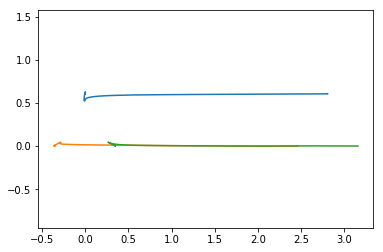

In [12]:
for x,y in zip(xs,ys):
    plt.plot(x,y)
plt.axis("equal")

In [13]:
x_ests = np.array(x_ests)

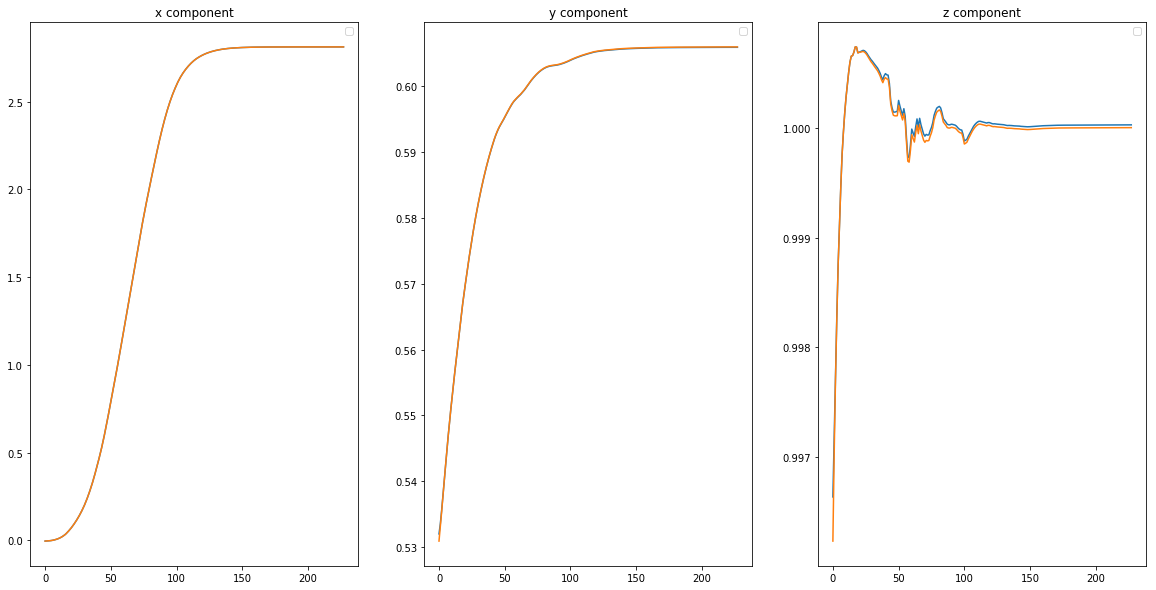

In [14]:
plot.plot_vectors(x_ests, full_states[0][i_init:,:])

In [15]:
x_ests.shape

(228, 12)

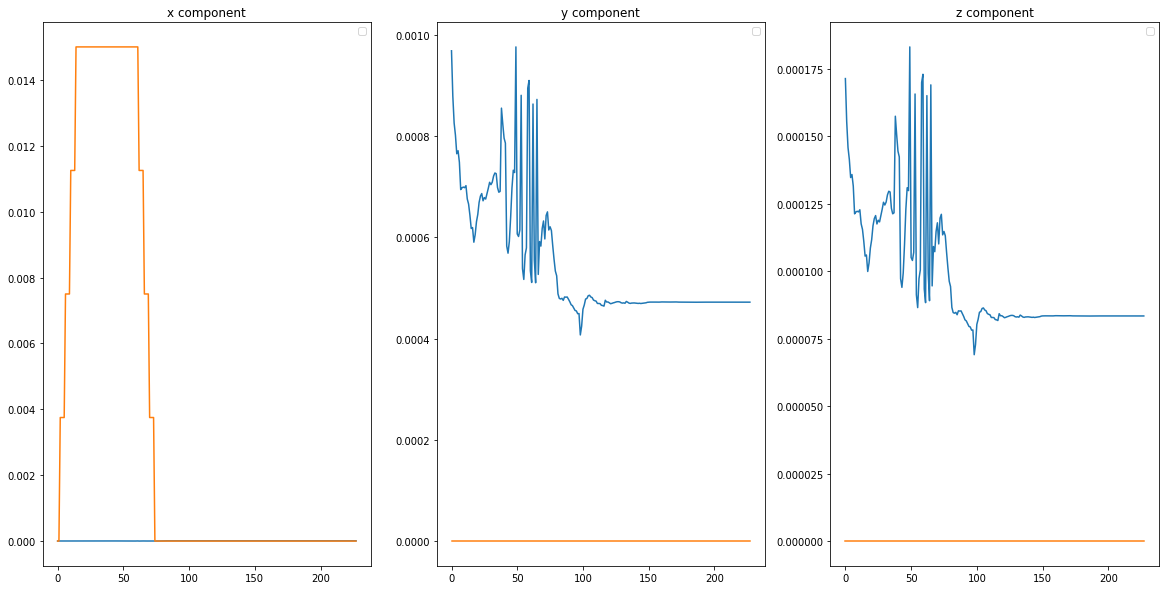

In [16]:
plot.plot_vectors(np.array(F_humans), processed[BOX][F_HUMAN][i_init:,1:])

In [17]:
np.array(F_humans).shape

(228, 3)

In [18]:
processed[BOX][F_HUMAN].shape

(273, 7)

In [19]:
full_states[1].shape

(273, 12)

In [20]:
full_states[0][1,:]

array([ 0.00000000e+00,  6.06000006e-01,  1.74218414e-07,  0.00000000e+00,
        0.00000000e+00,  8.89178216e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.74524084e-01,  0.00000000e+00,  0.00000000e+00])

In [21]:
full_states[0][5,:].shape

(12,)

In [22]:
F_humans[0]

array([2.15589318e-06, 9.68119487e-04, 1.71280236e-04])

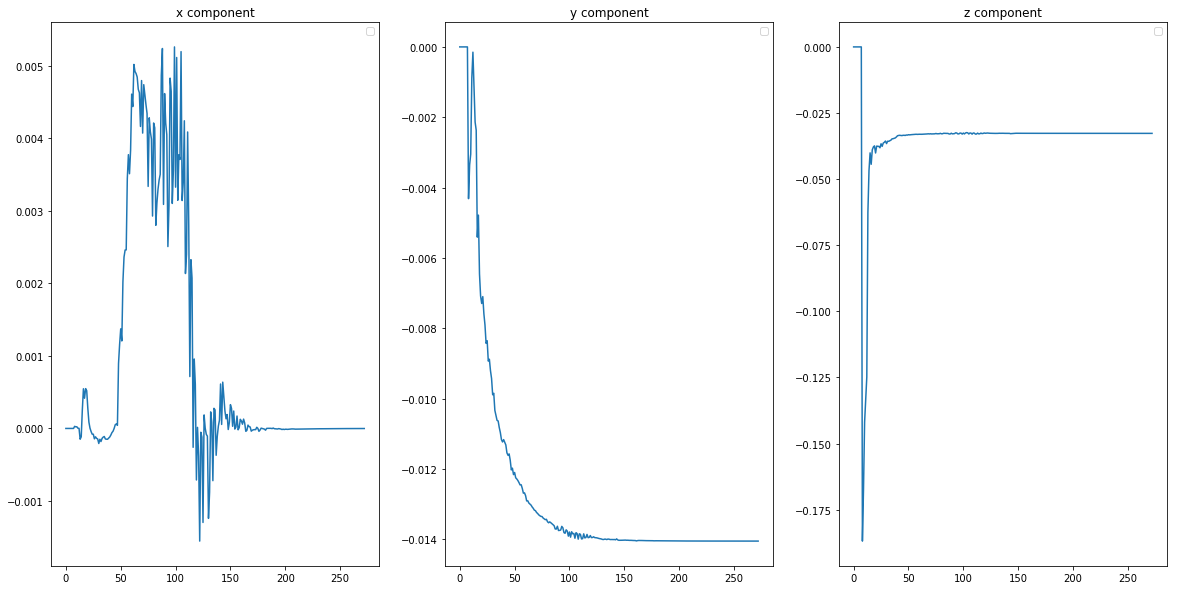

In [23]:
plot.plot_vectors(processed[DRONES[0]][EXTERNAL_FORCE][:,1:])

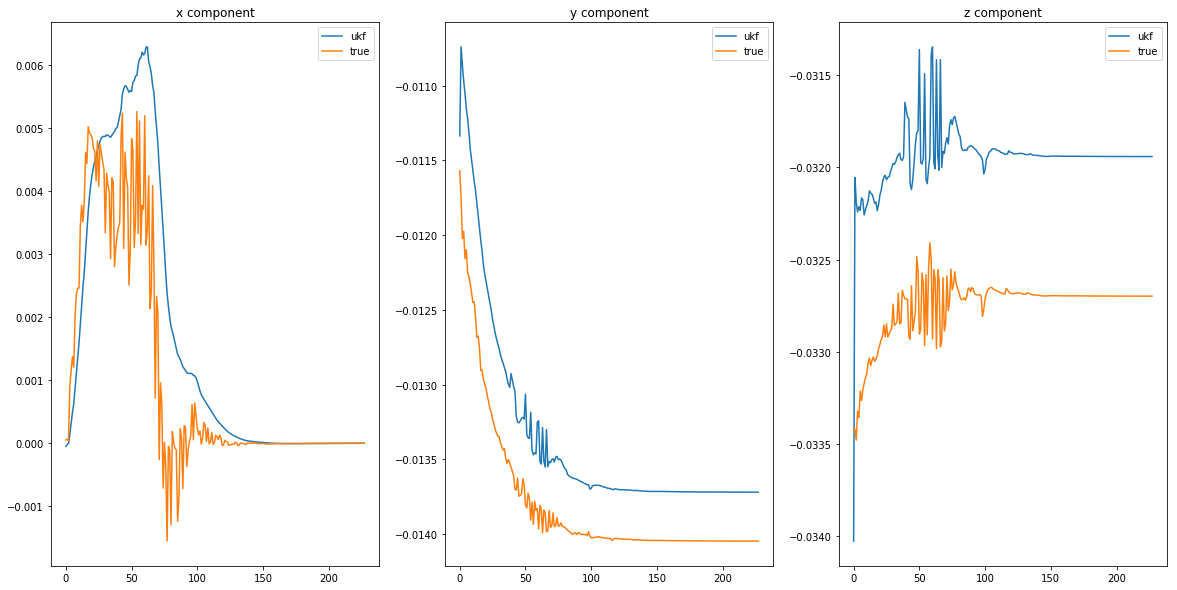

In [24]:
Fts = np.array(ukf.Fts)
plot.plot_vectors(Fts,processed[DRONES[0]][EXTERNAL_FORCE][i_init:,1:], names=["ukf", "true"])

In [25]:
processed[DRONES[0]][CONTROL][0,:]

array([1.56385666e+09, 7.84801394e-02, 7.84801394e-02, 7.84801394e-02,
       7.84801394e-02])